In [54]:
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np

In [55]:
data_transform = transforms.Compose([transforms.ToTensor()])

In [56]:
train_dataset = datasets.ImageFolder(root='./data/train/', transform=data_transform)

In [57]:
dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)

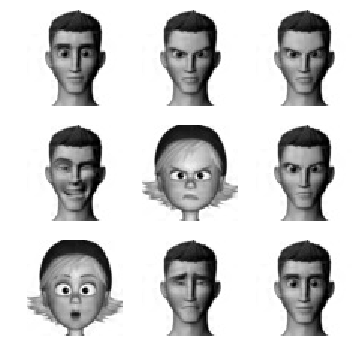

In [64]:
%matplotlib inline
first_batch, _ = next(iter(dataset_loader))  # retrieve the first batch
fig = plt.figure(figsize=(12, 6))
for row in range(1, 4):  # show 3 rows
    for col in range(1, 4):  # show 3 columns
        index = 6 * (row - 1) + col
        image = first_batch[index - 1, 0, :]  # retrieve images as (28, 28) tensors
        #print image.shape
        fig.add_subplot(3, 6, index)
        #index = torch.LongTensor([1,2,0])
        #image[index]=image
        plt.imshow(image.numpy())

        plt.axis('off')
plt.show()

In [65]:
from torchsummary import summary
import torch 
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

In [66]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        
        #conv 1
        self.cnn1=nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=2)
        self.relu1=nn.ReLU()

        #Maxpool 1
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        #conv 2
        self.cnn2=nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=2)
        self.relu2=nn.ReLU()

        #Maxpool 2
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
    def forward(self, x):
        #conv1
        out=self.cnn1(x)
        out=self.relu1(out)
        
        #max poo1 1
        out=self.maxpool1(out)
       
        #conv2
        out=self.cnn2(out)
        out=self.relu2(out)
        
        #max poo1 2
        out=self.maxpool2(out)
        #print out.shape
        return out

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.DCV1 = nn.ConvTranspose2d(in_channels=64, out_channels=128, kernel_size=4, stride=1, padding=2)
        self.relu1=nn.ReLU()
        self.DCV2 = nn.ConvTranspose2d(128, 64, 4, 2, 1)
        self.relu2=nn.ReLU()
        self.DCV3 = nn.ConvTranspose2d(64, 3, 4, 2, 1)
        

    def forward(self, x):
        out = self.DCV1(x)
        out = self.relu1(out)
        out = self.DCV2(out)
        out = self.relu2(out)
        out = self.DCV3(out)
        out = F.tanh(out)
        return out

In [67]:
encoder = Encoder()
decoder = Decoder()
print summary(encoder, (3, 64, 64))
#print encoder
#print decoder
print summary(decoder, (64, 17, 17))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 32L, 66L, 66L]             896
              ReLU-2        [-1, 32L, 66L, 66L]               0
         MaxPool2d-3        [-1, 32L, 33L, 33L]               0
            Conv2d-4        [-1, 64L, 35L, 35L]           18496
              ReLU-5        [-1, 64L, 35L, 35L]               0
         MaxPool2d-6        [-1, 64L, 17L, 17L]               0
Total params: 19392
Trainable params: 19392
Non-trainable params: 0
----------------------------------------------------------------
None
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1       [-1, 128L, 16L, 16L]          131200
              ReLU-2       [-1, 128L, 16L, 16L]               0
   ConvTranspose2d-3        [-1, 64L, 32L, 32L]          131136
              ReLU-4        

In [68]:
criterion = nn.MSELoss()
# criterion = nn.CrossEntropyLoss()
params = list(decoder.parameters()) + list(encoder.parameters())
optimizer = torch.optim.Adam(params, lr=0.002)

In [69]:
epochs=50
for epoch in range(epochs):
    for i, (images, labels) in enumerate(dataset_loader):
        images = Variable(images)
#         labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = encoder(images)
        outputs = decoder(outputs)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        
        if (i) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f' 
                   %(epoch+1, epochs, i+1, len(train_dataset)//16, loss.data[0]))
        
        

Epoch [1/50], Iter [1/25] Loss: 0.5044
Epoch [2/50], Iter [1/25] Loss: 0.0376
Epoch [3/50], Iter [1/25] Loss: 0.0160
Epoch [4/50], Iter [1/25] Loss: 0.0078
Epoch [5/50], Iter [1/25] Loss: 0.0065
Epoch [6/50], Iter [1/25] Loss: 0.0047
Epoch [7/50], Iter [1/25] Loss: 0.0044
Epoch [8/50], Iter [1/25] Loss: 0.0033
Epoch [9/50], Iter [1/25] Loss: 0.0030
Epoch [10/50], Iter [1/25] Loss: 0.0025
Epoch [11/50], Iter [1/25] Loss: 0.0020
Epoch [12/50], Iter [1/25] Loss: 0.0021
Epoch [13/50], Iter [1/25] Loss: 0.0018
Epoch [14/50], Iter [1/25] Loss: 0.0017
Epoch [15/50], Iter [1/25] Loss: 0.0019
Epoch [16/50], Iter [1/25] Loss: 0.0020
Epoch [17/50], Iter [1/25] Loss: 0.0016
Epoch [18/50], Iter [1/25] Loss: 0.0014
Epoch [19/50], Iter [1/25] Loss: 0.0012
Epoch [20/50], Iter [1/25] Loss: 0.0011
Epoch [21/50], Iter [1/25] Loss: 0.0015
Epoch [22/50], Iter [1/25] Loss: 0.0018
Epoch [23/50], Iter [1/25] Loss: 0.0018
Epoch [24/50], Iter [1/25] Loss: 0.0010
Epoch [25/50], Iter [1/25] Loss: 0.0010
Epoch [26

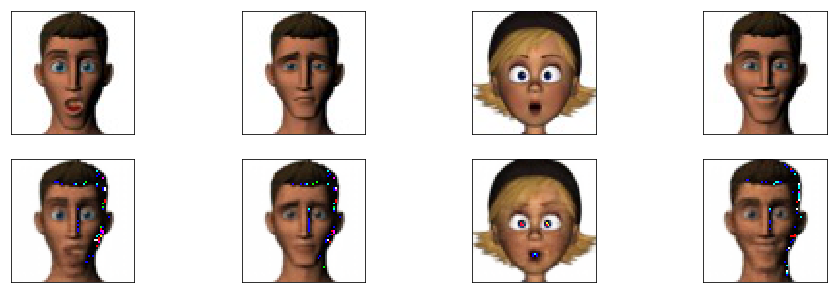

In [70]:
encoder.eval()
decoder.eval()

# total images to display
n = 5
plt.figure(figsize=(20,5))

for images, labels in dataset_loader:
    
    images = Variable(images)
    outputs = encoder(images)
    outputs = decoder(outputs)
    count = 0
    
    in_out = zip(images, outputs)
    for image, output in in_out:
        count += 1
        if count >= n:
            break
            
        # display original images    
        ax = plt.subplot(2, n, count + 1)
        #print output.shape
        plt.imshow(image.data.numpy().transpose(1,2,0))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display reconstruction
        ax = plt.subplot(2, n, count + 1 + n)
        #print output.shape
        plt.imshow(output.data.numpy().transpose(1,2,0))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)   
            
    break

In [71]:
torch.save(encoder.state_dict(), 'encoder.pkl')
torch.save(decoder.state_dict(), 'decoder.pkl')

In [72]:
reconstruction_loss = nn.MSELoss()

In [73]:
encoder.eval()
decoder.eval()
test_loss = 0
for data, _ in dataset_loader:

    data = Variable(data, volatile=True)
    out = encoder(data)
    out = decoder(out)
    test_loss += reconstruction_loss(out, data).data[0]

test_loss /= len(dataset_loader.dataset)
print('====> Test set loss', test_loss)

('====> Test set loss', 3.7287050487120585e-05)


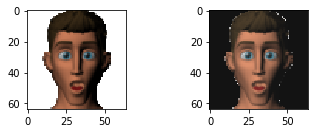

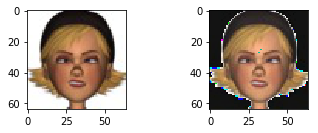

In [319]:
# Test Man dataset
t1,y = train_dataset[0]
ax = plt.subplot(2, 2, 1)
plt.imshow(t1.numpy().transpose(1,2,0))
ax = plt.subplot(2, 2, 2)
at1=t1+0.08
plt.imshow((at1.numpy()).transpose(1,2,0))
plt.show()

# test woman dataset
t2,y = train_dataset[256]
bx = plt.subplot(2, 2, 1)
plt.imshow(t2.numpy().transpose(1,2,0))
bx = plt.subplot(2, 2, 2)
at2=t2+0.08
plt.imshow((at2.numpy()).transpose(1,2,0))
plt.show()

In [348]:
plt.figure(figsize=(50,5))
def evaluate(inp,ori):
    images = inp.unsqueeze(0)
    images = Variable(images)
    outputs = encoder(images)
    outputs = decoder(outputs)
    #print images.shape
    #print outputs.shape
    # display noisy images    
    ax = plt.subplot(2, 3, 1)
    #print output.shape
    plt.imshow(images.squeeze(0).data.numpy().transpose(1,2,0))
    plt.gray()
    plt.title('noisy image')

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, 3, 2)
    #print output.shape
    plt.imshow(outputs.squeeze(0).data.numpy().transpose(1,2,0))
    plt.gray()
    plt.title('reconstructed image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 
    
    # display ori images    
    ax = plt.subplot(2, 3, 3)
    #print output.shape
    plt.imshow(ori.squeeze(0).numpy().transpose(1,2,0))
    plt.gray()
    plt.title('original image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.show()
    print ('reconstruction loss : %f '%(reconstruction_loss(Variable(ori), images).data[0]))

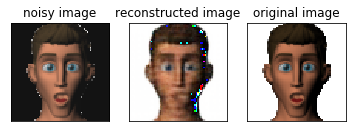

reconstruction loss : 0.006400 


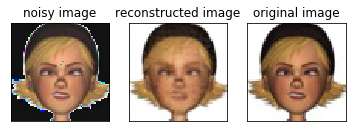

reconstruction loss : 0.006400 


In [349]:
evaluate(at1,t1)
evaluate(at2,t2)